In [1]:
import numpy as np
import gate_operations as go
import qutip as qt
import random
from functools import reduce

from scipy.sparse import lil_array
from scipy.sparse import csr_matrix
import scipy.sparse

import matplotlib.pyplot as plt

# Visualized Single Qubit Transformations



True


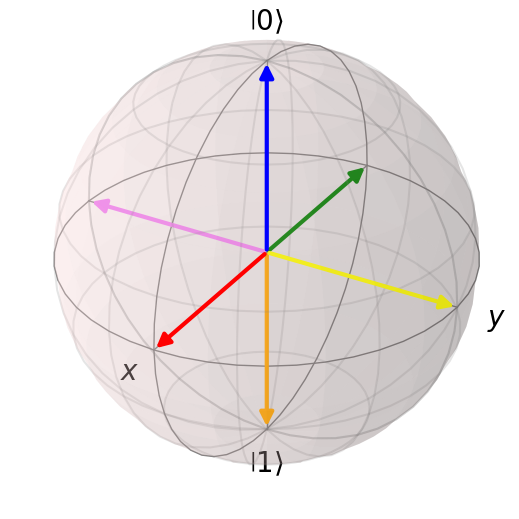

In [2]:
# INPUT SPACE
state = np.array([1,0])

print(state.shape == (2,))

assure_normalization = True




# create plot
bloch_sphere = qt.Bloch()

if assure_normalization:
    state = go.normalization_check(state)

# SEQUENCE
go.plot_bloch_state(state, bloch_sphere, "blue")

state = go.gate_operation(state, go.H())

go.plot_bloch_state(state, bloch_sphere, "red")

state = go.gate_operation(state, go.R_z(np.pi/2))
state = go.gate_operation(state, go.R_x(np.pi))

go.plot_bloch_state(state, bloch_sphere, "violet")

state = go.gate_operation(state, go.R_x(np.pi/2))
state = go.gate_operation(state, go.R_y(np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "green")

state = go.gate_operation(state, go.R_z(-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "yellow")

state = go.gate_operation(state, go.R(np.array([1,0,0]),-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "orange")




bloch_sphere.show()


# Generating specific states

### Bell states

$\begin{aligned}
    \ket{\Phi^+} &= \frac{\ket{00} + \ket{11}}{\sqrt{2}} \ \ \ \ \ \ket{\Phi^-} &= \frac{\ket{00} - \ket{11}}{\sqrt{2}} \\[8pt]
    \ket{\Psi^+} &= \frac{\ket{01} + \ket{10}}{\sqrt{2}} \ \ \ \ \ \ket{\Psi^-} &= \frac{\ket{01} - \ket{10}}{\sqrt{2}} \\
\end{aligned}$

In [3]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 2, 1)
CNOT12 = go.CNOT(2,1,2)
X1 = go.single_qubit_gate_to_full_gate(go.X(), 2, 1)
X2 = go.single_qubit_gate_to_full_gate(go.X(), 2, 2)

phi_plus  = np.array([1,0,0,0])
phi_plus = go.gate_operation(phi_plus, H1)
phi_plus = go.gate_operation(phi_plus, CNOT12)

print("Phi+ = " + str(phi_plus))

phi_minus  = np.array([1,0,0,0])
phi_minus = go.gate_operation(phi_minus, X1)
phi_minus = go.gate_operation(phi_minus, H1)
phi_minus = go.gate_operation(phi_minus, CNOT12)

print("Phi- = " + str(phi_minus))

psi_plus  = np.array([1,0,0,0])
psi_plus = go.gate_operation(psi_plus, X2)
psi_plus = go.gate_operation(psi_plus, H1)
psi_plus = go.gate_operation(psi_plus, CNOT12)

print("Psi+ = " + str(psi_plus))

psi_minus  = np.array([1,0,0,0])
psi_minus = go.gate_operation(psi_minus, X1)
psi_minus = go.gate_operation(psi_minus, X2)
psi_minus = go.gate_operation(psi_minus, H1)
psi_minus = go.gate_operation(psi_minus, CNOT12)

print("Psi+ = " + str(psi_minus))



Phi+ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Phi- = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Psi+ = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Psi+ = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


### Greenberger–Horne–Zeilinger state

$\ket{\text{GHZ}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}$

In [4]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 3, 1)
CNOT12 = go.CNOT(3,1,2)
CNOT23 = go.CNOT(3,2,3)

GHZ = np.zeros((2**3,))
GHZ[0] = 1

GHZ = go.gate_operation(GHZ, H1)
GHZ = go.gate_operation(GHZ, CNOT12)
GHZ = go.gate_operation(GHZ, CNOT23)

print("GHZ = " + str(GHZ))

GHZ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# Instructional Syntax

### Single Instruction

In [5]:
state = np.array([2,4,3,0.1])
state = go.normalization_check(state)

instruction = go.instruction("CNOT",[1,2]) # Directly create instruction object

state1 = go.gate_operation(state, go.CNOT(2,1,2))
state2 = go.apply_instruction(state, instruction, 2)

print(state1)
print(state2)

[0.37132666 0.74265332 0.01856633 0.55698999]
[0.37132666 0.74265332 0.01856633 0.55698999]


### Instruction List

In [6]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate = go.single_qubit_gate_to_full_gate(go.H(),2,1)
state1 = go.gate_operation(state, gate)

inst = go.instruction.create_from_list(["H",[1]]) # Create instruction objects automatically from list syntax
state2 = go.apply_instruction(state, inst, 2)

print(state1)
print(state2)

[ 0.7367723 +0.j  0.61040722+0.j -0.08705001+0.j -0.27747416+0.j]
[ 0.7367723 +0.j  0.61040722+0.j -0.08705001+0.j -0.27747416+0.j]


In [7]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate1 = go.single_qubit_gate_to_full_gate(go.H(),2,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),2,2)
instructions = go.create_instruction_list([["H",[1]],["X",[2]]]) # create list of instruction objects from list syntax
 
state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state2 = reduce(go.apply_instruction, instructions, state)  # apply list of instructions

print(state1)
print(state2)

[ 0.66143116+0.j  0.73463211+0.j -0.11395147+0.j -0.09919447+0.j]
[ 0.66143116+0.j  0.73463211+0.j -0.11395147+0.j -0.09919447+0.j]


In [8]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

# Computation with direct gate functions
gate1 = go.single_qubit_gate_to_full_gate(go.H(),3,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),3,2)
gate3 = go.single_qubit_gate_to_full_gate(go.R_x(np.pi),3,2)
gate4 = go.CNOT(3,2,1)
gate5 = go.single_qubit_gate_to_full_gate(go.R(np.array([0,1,0]),np.pi),3,3)
gate6 = go.single_qubit_gate_to_full_gate(go.T(),3,1)
gate7 = go.single_qubit_gate_to_full_gate(go.T(),3,2)
gate8 = go.single_qubit_gate_to_full_gate(go.T(),3,3)

state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state1 = go.gate_operation(state1, gate3)
state1 = go.gate_operation(state1, gate4)
state1 = go.gate_operation(state1, gate5)
state1 = go.gate_operation(state1, gate6)
state1 = go.gate_operation(state1, gate7)
state1 = go.gate_operation(state1, gate8)


# Computation with instruction list and multiple instructions
instructions = go.create_instruction_list([["H",[1]],
                                           ["X",[2]],
                                           ["Rx",[2],np.pi],
                                           ["CNOT",[2,1]],
                                           ["R",[3],np.pi,np.array([0,1,0])],
                                           ["T",[1,2,3]]])

state2 = reduce(go.apply_instruction, instructions, state)

print(state1)
print(state2)

print("Are they the same?")
print(np.allclose(state1,state2))

[-1.52255093e-17+1.31045034e-01j  5.51683455e-01-5.51683455e-01j
 -3.22060057e-02+3.22060057e-02j  1.21255702e-01-3.46944695e-17j
 -6.07271006e-02+6.07271006e-02j -5.16984686e-01+0.00000000e+00j
 -2.48651437e-01+0.00000000e+00j  1.02137816e-01+1.02137816e-01j]
[-1.52255093e-17+1.31045034e-01j  5.51683455e-01-5.51683455e-01j
 -3.22060057e-02+3.22060057e-02j  1.21255702e-01-2.64829026e-17j
 -6.07271006e-02+6.07271006e-02j -5.16984686e-01-1.46319759e-17j
 -2.48651437e-01-1.86327127e-17j  1.02137816e-01+1.02137816e-01j]
Are they the same?
True


### Random Instructions

In [9]:
random_instruction = go.instruction.random_instruction(5) # create any random instruction

print(vars(random_instruction))

{'gate': 'R', 'qubit': [5], 'direction': array([-0.04654952, -0.02495047,  0.29113042]), 'angle': 5.83966259638074, 'probability': 1.0}


In [10]:
random_instruction = go.instruction.random_single_qubit_instruction(5) # create any single qubit random instruction

print(vars(random_instruction))

{'gate': 'Ry', 'qubit': [5], 'direction': array([0, 0, 1]), 'angle': 0.28688866402328245, 'probability': 1.0}


In [11]:
random_instruction = go.instruction.chunked_random_instruction(10,3) # create any random instruction, but with separate chunks of unentangled qubits

print(vars(random_instruction))

{'gate': 'S', 'qubit': [9], 'direction': array([0, 0, 1]), 'angle': 0.0, 'probability': 1.0}


# Benchmark (1000 random gates)

On my system:
| Qubits | (old) only dense matrices [s]  | Using internal sparse [s] |  
|------|-----|-----|
| 1 | 0.0 | 0.0 |
| 2 | 0.1 | 0.1 |  
| 3 | 0.1 | 0.1 |
| 4 | 0.1 | 0.2 |
| 5 | 0.2 | 0.2 |
| 6 | 0.3 | 0.3 |
| 7 | 0.6 | 0.6 |
| 8 | 2.9 | 3.6 |
| 9 | 15.9 | 7.9 | 
| 10 | 81.6 | 28.2 | 
| 11 | 422.4 | 115.2 | 

In [12]:
qubit_amount = 3


# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1

for gate_number in range(0,1000):
    state = go.apply_instruction(state, go.instruction.random_instruction(qubit_amount), qubit_amount)

print(state)

[ 0.43902979-0.18383087j  0.35581194+0.03103569j -0.43335638-0.10105883j
  0.15824499+0.20087192j  0.27467596-0.29709437j -0.17134372+0.20966456j
  0.03174705-0.24928061j -0.19295164-0.212328j  ]


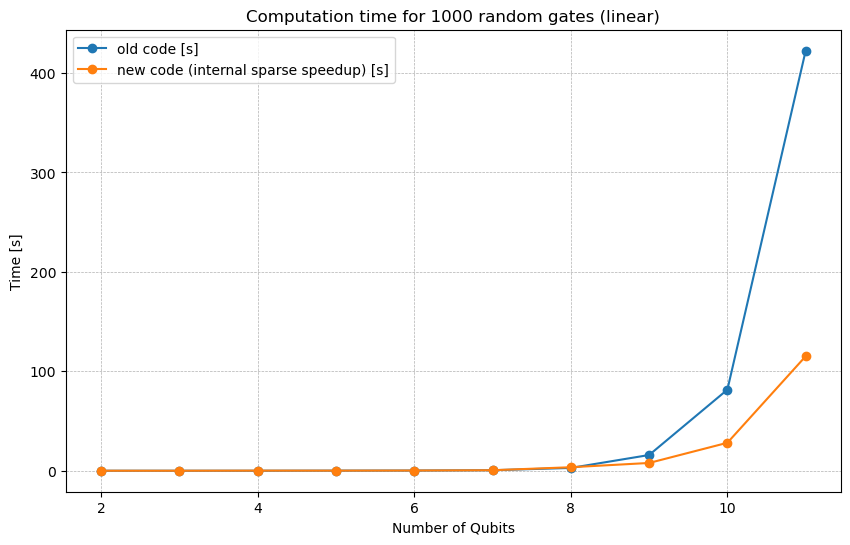

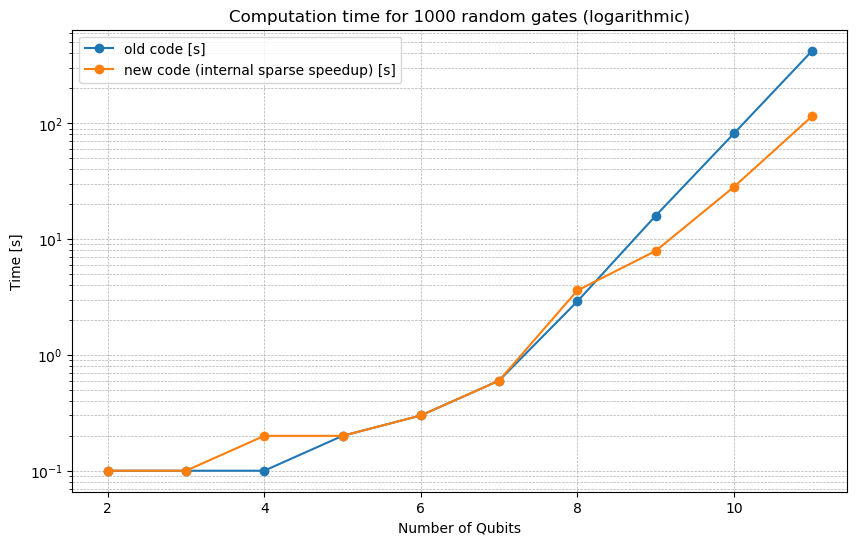

In [13]:

# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
old_code = [0.1, 0.1, 0.1, 0.2, 0.3, 0.6, 2.9, 15.9, 81.6, 422.4]
sparse_speedup = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, old_code, marker='o', label='old code [s]')
plt.plot(qubits, sparse_speedup, marker='o', label='new code (internal sparse speedup) [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Using scipy.sparse

In [14]:
qubit_amount = random.randint(1, 6)

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
        
# non sparse
Y = go.single_qubit_gate_to_full_gate(go.Y(), qubit_amount, random.randint(1, qubit_amount))
        
# sparse transformation
Y_sparse = csr_matrix(Y)
state_sparse = csr_matrix(state.T)

sol1 = go.gate_operation(state, Y)

sol2 = go.gate_operation(state_sparse, Y_sparse)
        
#convert sparse back 
sol2 = sol2.toarray().T
      
compare = np.allclose(sol1,sol2)

print("Same solution?")
print(compare)
    

Same solution?
True


Calculations are done automatically with sparse matrices when using the instruction syntax and providing the state as a scipy csr_matrix

In [15]:
qubit_amount = 2

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state) # transform into csr_matrix 

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)
    
    state = go.apply_instruction(state, instr , qubit_amount) # this uses mostly dense matrices
    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount) # this uses only sparse matrices

compare = np.allclose(state,state_sparse.toarray().T)

print(state)
print(state_sparse.toarray().T)
print("Are they the same?")
print(compare)


[ 0.18877995-0.01183738j -0.08873441-0.67108203j  0.10317474-0.14556837j
  0.09530807+0.6819665j ]
[[ 0.18877995-0.01183738j -0.08873441-0.67108203j  0.10317474-0.14556837j
   0.09530807+0.6819665j ]]
Are they the same?
True


## Benchmarks

### 1000 random gates

On my system:
| Qubits | All gates [s] | Single Qubit gates [s] | Chunked gates (3) [s] |
|------|-----|-----| -----|
| 1 | 0.1 | 0.1 | 0.1 |
| 2 | 0.5 | 0.4 | 0.5 |
| 3 | 0.8 | 0.6 | 0.6 |
| 4 | 1.0 | 0.8 | 1.1 |
| 5 | 1.3 | 1.1 | 1.5 |
| 6 | 1.7 | 1.4 | 1.8 |
| 7 | 2.1 | 1.6 | 2.1 |
| 8 | 2.7 | 2.3 | 2.8 |
| 9 | 5.4 | 5.5 | 5.5 |
| 10 | 16.7 | 19.0 | 16.9 |
| 11 | 66.4 | 78.2 | 56.5 |
| 12 | 254.0 | 264.6 | 222.5 |

In [16]:
qubit_amount = 5

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[ 0.09414608-0.27823747j  0.26939869+0.03296798j -0.05835938-0.11717215j
   0.01495024-0.03368223j -0.16317505+0.11582943j -0.11853876+0.11655501j
  -0.01716497+0.11087423j  0.11054368-0.14930693j  0.10787995-0.07485802j
  -0.14727344+0.07201847j  0.06442767-0.12465187j -0.11447749-0.06452634j
   0.06385712-0.03244455j  0.0579148 +0.21165763j -0.02758963+0.35004582j
  -0.0863625 +0.0523171j   0.0729352 -0.16303634j  0.1194358 -0.07795623j
  -0.03137069+0.15820347j -0.28028545+0.04562899j  0.01820356-0.00175446j
  -0.12100328-0.17906747j  0.05955126-0.03262917j  0.0090263 -0.06251523j
   0.1285499 +0.18650174j  0.17339748-0.14117974j  0.03333164+0.07875438j
  -0.08225764+0.18803506j -0.26228894+0.01948044j  0.00383002-0.03242409j
  -0.02279547-0.00087411j -0.00694336+0.05334691j]]


In [17]:
qubit_amount = 3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.random_single_qubit_instruction(qubit_amount)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[-0.54212869+0.41869092j  0.47311364+0.01135949j  0.36111989-0.07843172j
  -0.22788513-0.11511742j  0.01452834+0.23427723j  0.09418706-0.13201574j
   0.04718468-0.11751248j -0.07646849+0.04250669j]]


In [18]:
qubit_amount =  3

# state prep |0000...0000〉
state = np.zeros((2**qubit_amount,))
state[0] = 1
state_sparse = csr_matrix(state)

for gate_number in range(0,1000):
    instr = go.instruction.chunked_random_instruction(qubit_amount,3)

    state_sparse = go.apply_instruction(state_sparse, instr , qubit_amount)

print(state_sparse.toarray().T)

[[-0.00436457+0.01826251j -0.19792815-0.32588958j -0.30883911+0.09269999j
  -0.22521092-0.53662109j  0.310778  +0.0307554j   0.0439693 -0.33304279j
  -0.30453975+0.22879124j -0.18753841-0.14481236j]]


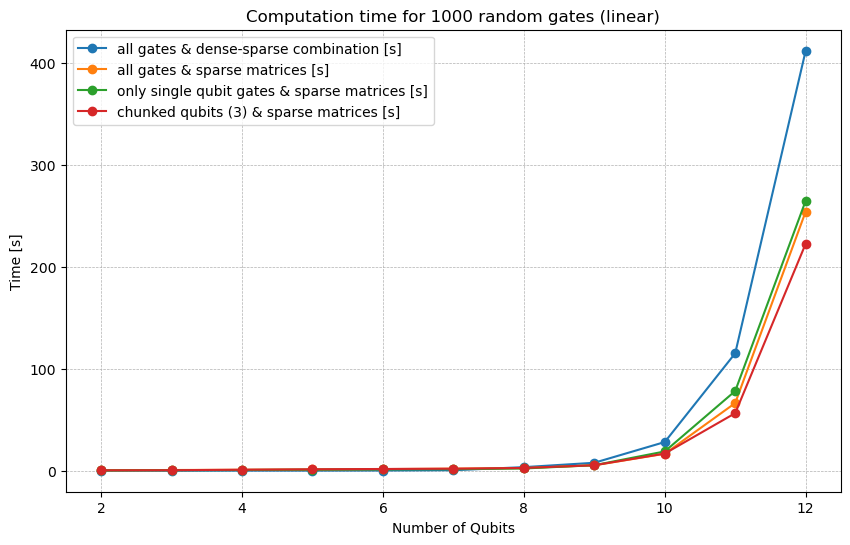

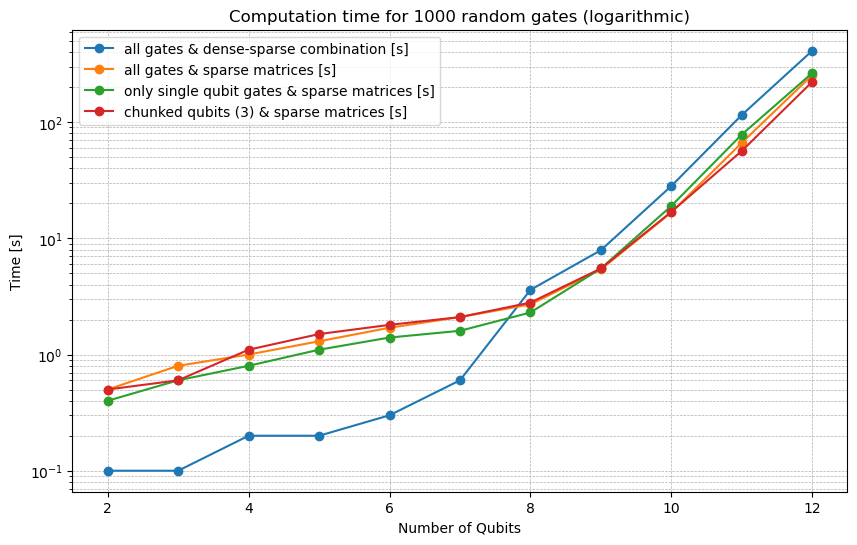

In [19]:
# Data from the table
qubits = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
non_sparse = [0.1, 0.1, 0.2, 0.2, 0.3, 0.6, 3.6, 7.9, 28.2, 115.2,411.6]
all_gates = [0.5, 0.8, 1.0, 1.3, 1.7, 2.1, 2.7, 5.4, 16.7, 66.4, 254.0]
single_qubit_gates = [0.4, 0.6, 0.8, 1.1, 1.4, 1.6, 2.3, 5.5, 19.0, 78.2, 264.6]
chunked_gates = [0.5, 0.6, 1.1, 1.5, 1.8, 2.1, 2.8, 5.5, 16.9, 56.5, 222.5]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (linear)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# another log plot
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(qubits, non_sparse, marker='o', label='all gates & dense-sparse combination [s]')
plt.plot(qubits, all_gates, marker='o', label='all gates & sparse matrices [s]')
plt.plot(qubits, single_qubit_gates, marker='o', label='only single qubit gates & sparse matrices [s]')
plt.plot(qubits, chunked_gates, marker='o', label='chunked qubits (3) & sparse matrices [s]')

# Customize the plot
plt.title("Computation time for 1000 random gates (logarithmic)")
plt.xlabel("Number of Qubits")
plt.ylabel("Time [s]")

plt.yscale("log")  # Using logarithmic scale for better visibility of differences

plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


# Measurements

### Computational basis measurement

[0.5 0.5 0.5 0.5]
{'00': 239, '01': 251, '10': 251, '11': 259}


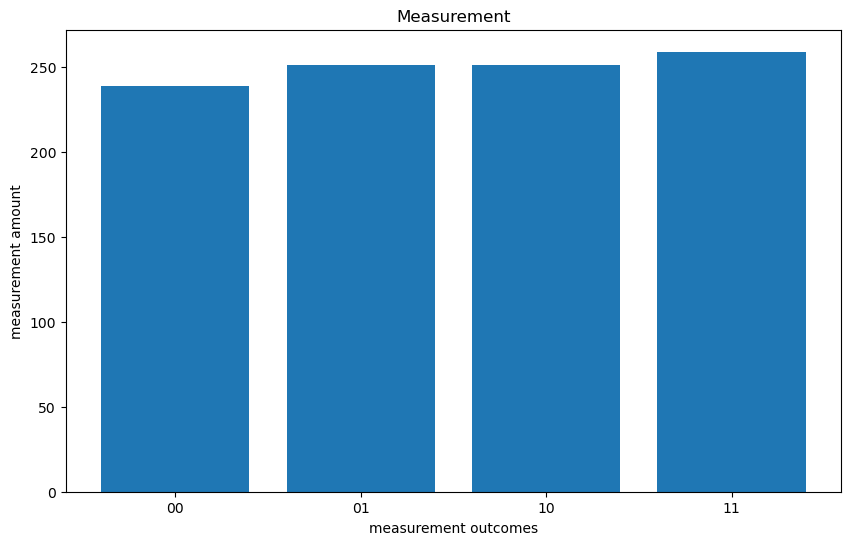

{'00': 0.268, '01': 0.244, '10': 0.238, '11': 0.25}


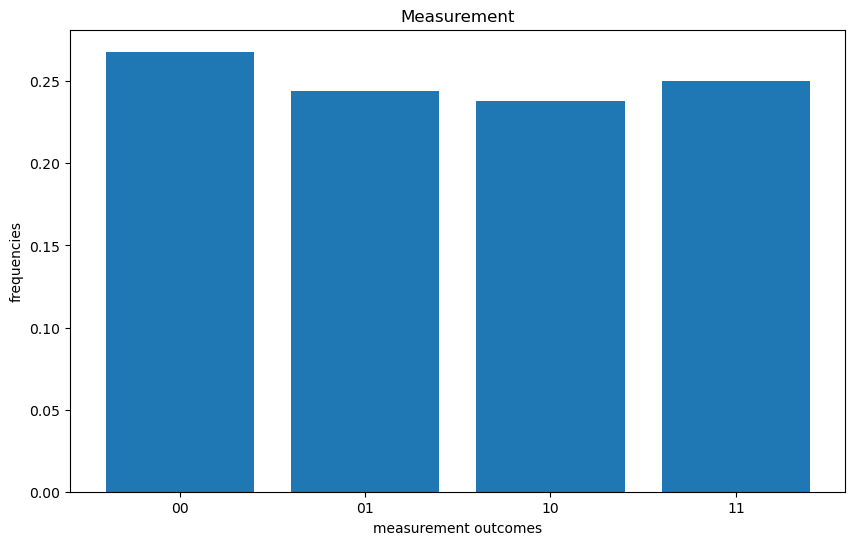

<module 'matplotlib.pyplot' from 'f:\\Programme\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
# prepare state
state = np.array([1, 0, 0, 0])
instructions = go.create_instruction_list([["H",[1,2]]])
state = reduce(go.apply_instruction, instructions, state)

print(state)

# Measurements
measurements = go.measure_computational(state,2,1000, False)
print(measurements)
go.plot_measurement(measurements,"Measurement","measurement amount")

frequencies = go.measure_computational(state,2,1000)
print(frequencies)
go.plot_measurement(frequencies,"Measurement","frequencies")

### Arbitrary projective measurement

[-2.13321079e-17-5.00000000e-01j  5.00000000e-01-2.13321079e-17j
  5.00000000e-01+2.13321079e-17j -2.13321079e-17+5.00000000e-01j]


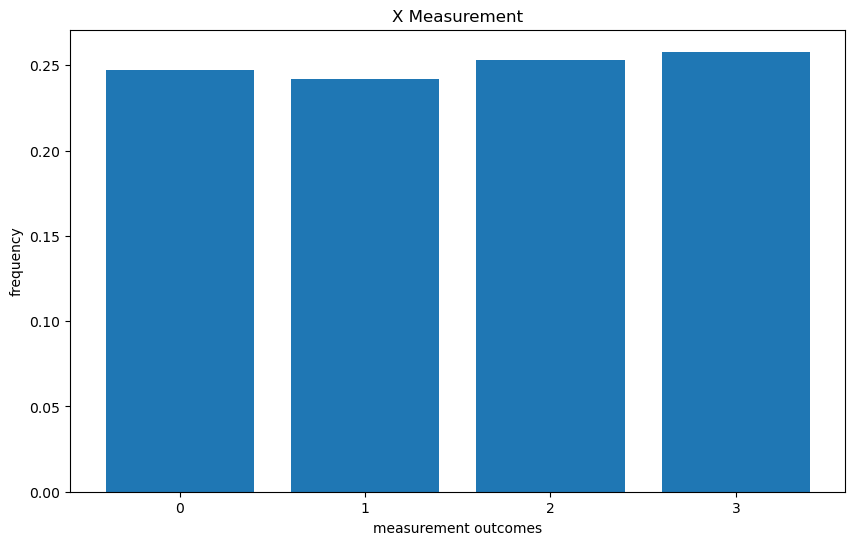

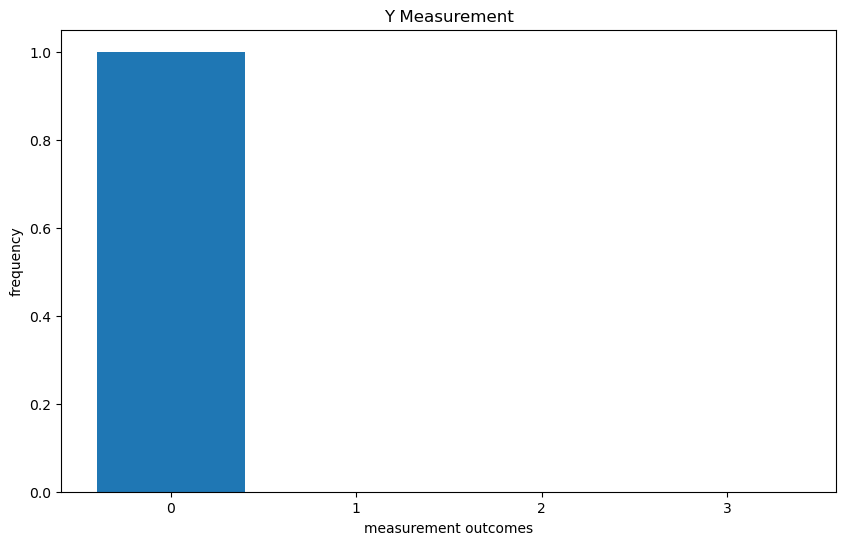

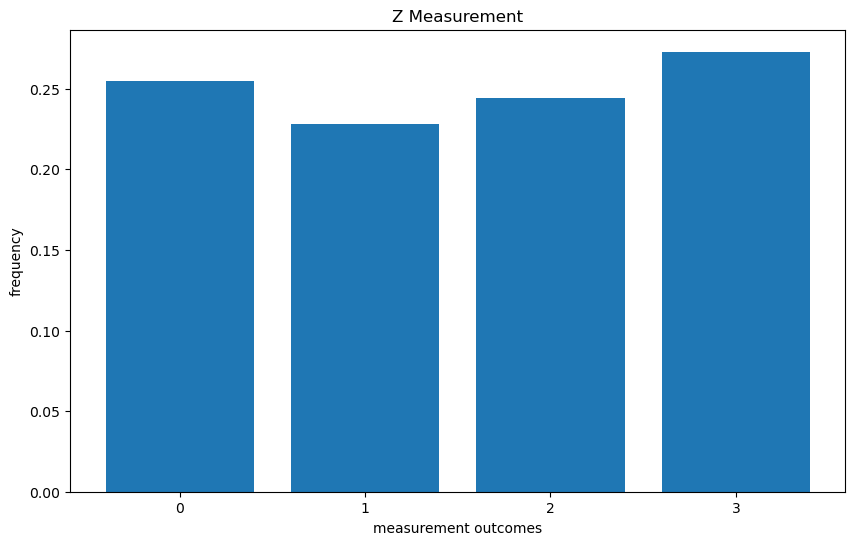

<module 'matplotlib.pyplot' from 'f:\\Programme\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [21]:
# prepare state
state = np.array([1, 0, 0, 0])
instructions = go.create_instruction_list([["H",[1,2]],
                                           ["Rz",[1,2],np.pi/2]])
state = reduce(go.apply_instruction, instructions, state)
print(state)

# Measurement in X basis
x_frequencies = go.measure_projective(state,2,1000, go.P_x(2))
go.plot_measurement(x_frequencies,"X Measurement","frequency")

# Measurement in Y basis
y_frequencies = go.measure_projective(state,2,1000, go.P_y(2))
go.plot_measurement(y_frequencies,"Y Measurement","frequency")

# measurement in Z basis (default)
z_frequencies = go.measure_projective(state,2,1000, go.P_z(2))
go.plot_measurement(z_frequencies,"Z Measurement","frequency")

# Mixed States

### Gates & instructions

In [22]:
# Define a pure state (|ψ⟩ = |000⟩)
pure_state = np.array([1,0,0,0,0,0,0,0])

# Density matrix representation of the pure state
mixed_state = np.outer(pure_state, pure_state.conj())  # ρ = |ψ⟩⟨ψ|

instructions = go.create_instruction_list([["H",[1]],
                                           ["X",[2]],
                                           ["Rx",[2],np.pi],
                                           ["CNOT",[2,1]],
                                           ["R",[3],np.pi,np.array([0,1,0])],
                                           ["T",[1,2,3]]])

# Evolve the states
pure_state =  reduce(go.apply_instruction, instructions, pure_state)
mixed_state = reduce(go.apply_instruction, instructions, mixed_state)

# Reconstruct the density matrix from the evolved state vector
new_mixed_state = np.outer(pure_state, pure_state.conj())

# Check if the evolved density matrices match
print("\nDo the evolved density matrices match?")
print(np.allclose(mixed_state, new_mixed_state))
    


Do the evolved density matrices match?
True


### Plotting mixed states

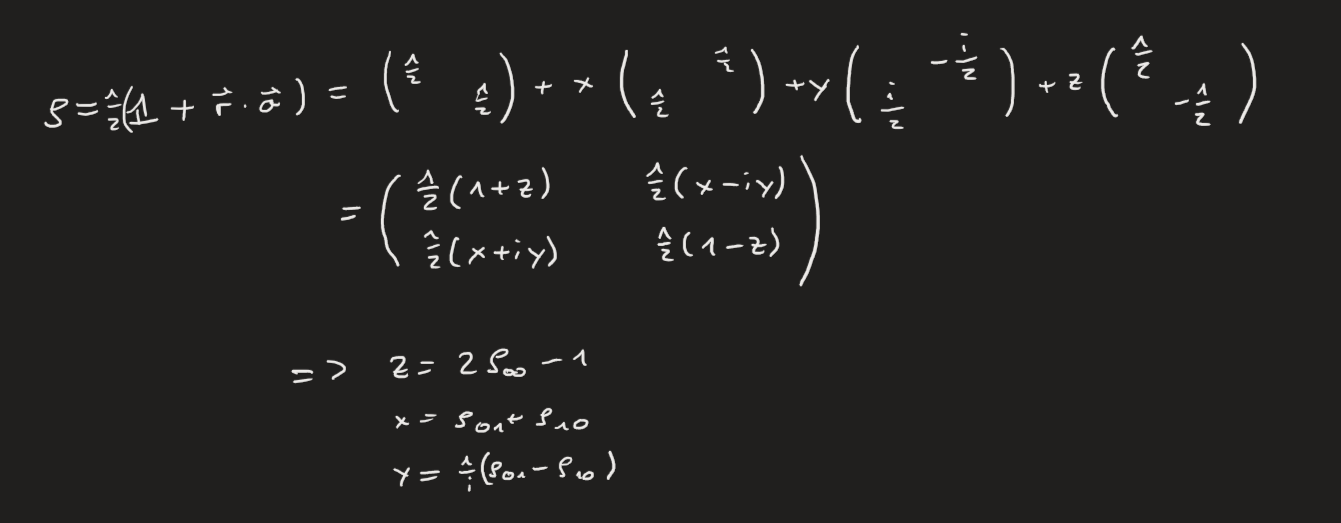

The mixed state is: 
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


f:\Programme\Anaconda\Lib\site-packages\matplotlib\transforms.py:1865: ComplexWarning: Casting complex values to real discards the imaginary part
  return affine_transform(values, mtx)


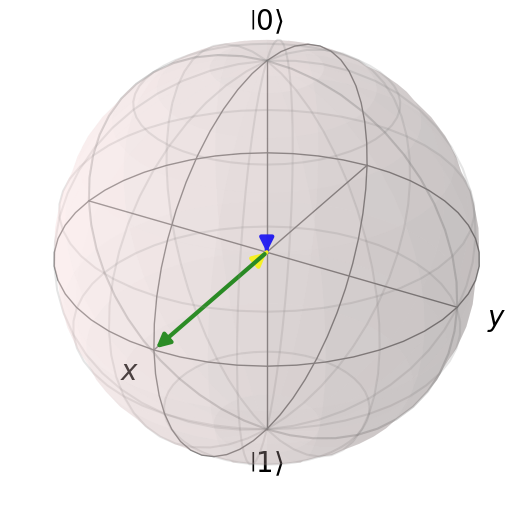

In [23]:
# states
state_1 = np.array([1,0],dtype=complex)
prob_1 = 0.4999999999999
state_2 = np.array([0,1],dtype=complex)
prob_2 = 1 - prob_1
mixed_state = prob_1 * np.outer(state_1, state_1.conj()) + prob_2 * np.outer(state_2, state_2.conj())

state_3 = np.array([1,1],dtype=complex)/np.sqrt(2)
state_4 = np.array([1,-1],dtype=complex)/np.sqrt(2)
mixed_state2 = prob_1 * np.outer(state_3, state_3.conj()) + prob_2 * np.outer(state_4, state_4.conj())

pure_state = np.array([1,1],dtype=complex) / np.sqrt(2)


print("The mixed state is: ")
print(mixed_state)

# create plot
bloch_sphere = qt.Bloch()

# SEQUENCE
go.plot_bloch_state(mixed_state, bloch_sphere, "blue")
go.plot_bloch_state(mixed_state2, bloch_sphere, "yellow")
go.plot_bloch_state(pure_state, bloch_sphere, "green")

bloch_sphere.show()


### Measurements

In [24]:
state = np.array([1,0,1j,1,0,2,3,-3])
state = go.normalization_check(state)

result_z = go.measure_projective(state,3,1000000,go.P_z(3))
result_x = go.measure_projective(state,3,1000000,go.P_x(3))
result_y = go.measure_projective(state,3,1000000,go.P_y(3))
        
mixed_state = np.outer(state, state.conj())

result_z2 = go.measure_projective(mixed_state,3,1000000,go.P_z(3))
result_x2 = go.measure_projective(mixed_state,3,1000000,go.P_x(3))
result_y2 = go.measure_projective(mixed_state,3,1000000,go.P_y(3))

print("Z-basis")
print("pure: " + str(result_z))
print("mixed: " + str(result_z2))
print("X-basis")
print("pure: " + str(result_x))
print("mixed: " +str(result_x2))
print("Y-basis")
print("pure: " +str(result_y))
print("mixed: " + str(result_y2))

Z-basis
pure: {0: 0.040373, 1: 0.0, 2: 0.040008, 3: 0.039872, 4: 0.0, 5: 0.159367, 6: 0.360869, 7: 0.359511}
mixed: {0: 0.039801, 1: 0.0, 2: 0.039877, 3: 0.040073, 4: 0.0, 5: 0.160251, 6: 0.360367, 7: 0.359631}
X-basis
pure: {0: 0.08535, 1: 0.084307, 2: 0.025124, 3: 0.185466, 4: 0.005073, 5: 0.084374, 6: 0.025195, 7: 0.505111}
mixed: {0: 0.084889, 1: 0.084927, 2: 0.025004, 3: 0.184634, 4: 0.005038, 5: 0.084671, 6: 0.025005, 7: 0.505832}
Y-basis
pure: {0: 0.124772, 1: 0.06493, 2: 0.065541, 3: 0.124821, 4: 0.225652, 5: 0.124171, 6: 0.044989, 7: 0.225124}
mixed: {0: 0.124602, 1: 0.064843, 2: 0.064638, 3: 0.125777, 4: 0.224944, 5: 0.125228, 6: 0.045072, 7: 0.224896}


# Experimental: Random states

In [25]:
# Generate a Haar random state in 4 dimensions (for a 2-qubit system)
haar_random_state = go.generate_haar_random_state(4)

print("Haar Random State:")
for key, value in haar_random_state.items():
    print(f"{key}:\n{value}\n")



Haar Random State:
Dimension:
4

Real Part:
[-0.09839061458737196, 0.8152307787537062, 0.28347879025338246, -0.19982520862967582]

Imaginary Part:
[-0.788157064617807, -0.3660087248939451, 0.23040268071009168, -0.4856591398131776]

Random Complex Vector:
[(-0.09839061458737196-0.788157064617807j), (0.8152307787537062-0.3660087248939451j), (0.28347879025338246+0.23040268071009168j), (-0.19982520862967582-0.4856591398131776j)]

Norm:
1.3559780288638865

Normalized Haar Random State:
[(-0.07256062597843792-0.5812461911924699j), (0.6012123805846262-0.26992231223732105j), (0.2090585424093462+0.16991623448584622j), (-0.14736611093698948-0.3581615110829559j)]

Normalization Check:
1.0000000000000002



In [26]:
# Generate a Hilbert-Schmidt random state in 3 dimensions
hilbert_schmidt_random_state = go.generate_hilbert_schmidt_random_state(3)

print("Hilbert_Schmidt_Random_State:")
for key, value in hilbert_schmidt_random_state.items():
    print(f"{key}:\n{value}\n")

Hilbert_Schmidt_Random_State:
Dimension:
3

Random Complex Matrix G:
[[(-1.05530416825452-0.8568750735893118j), (-0.13846335254935496-2.613398599938633j), (-1.1386198037257522-0.6770969190309114j)], [(0.07603808006593125+1.5538469089783251j), (0.7492918904684673-1.683616332668767j), (0.5222087711753055+1.0789943664618j)], [(-0.6074218281087972+0.337780974879248j), (-0.1187093749232097-0.6243273748968805j), (-0.18001339793822518+0.06996948925438694j)]]

GG^dagger:
[[(10.45184141663209+0j), (1.5593341023986+0.2582868488065213j), (2.1572225691031606+1.3022899104648509j)], [(1.5593341023986-0.2582868488065213j), (7.25315514246117+0j), (1.4223446368816173-0.5326323886624078j)], [(2.1572225691031606-1.3022899104648509j), (1.4223446368816173+0.5326323886624078j), (0.924234403857483+0j)]]

Trace of GG^dagger:
(18.629230962950743+0j)

Normalized Density Matrix (rho):
[[(0.5610452432211721+0j), (0.08370362177052595+0.013864600708434743j), (0.11579772527343615+0.06990572574116484j)], [(0.08370362

In [27]:
# Generate a Bures random state in 3 dimensions
bures_random_state = go.generate_bures_random_state(3)

print("Bures_Random_State:")
for key, value in bures_random_state.items():
    print(f"{key}:\n{value}\n")

Bures_Random_State:
Dimension:
3

Random Complex Matrix G:
[[(0.022170187960754248-0.33159713354424986j), (0.6714314612011051-0.3131698155154011j), (1.7013731434770312+0.7046038337103104j)], [(0.13017696991142216-0.5222930253315223j), (-0.825630361893878+0.3492136904020115j), (1.813685084049056-0.18152142228659388j)], [(-0.44830902664137556+0.5906927206926315j), (-0.20852878549560408-0.31380327181157724j), (-0.3502173127085932+1.8319118639886645j)]]

GG^dagger:
[[(4.05048085247376+0j), (2.4702139333463946+1.579267610374589j), (0.44737160938399884-2.951965577636527j)], [(2.4702139333463946-1.579267610374589j), (4.41575535470146+0j), (-1.2720060640697226-3.4335918046242826j)], [(0.44737160938399884+2.951965577636527j), (-1.2720060640697226+3.4335918046242826j), (4.170408864970574+0j)]]

Matrix B (I + GG^dagger):
[[(5.05048085247376+0j), (2.4702139333463946+1.579267610374589j), (0.44737160938399884-2.951965577636527j)], [(2.4702139333463946-1.579267610374589j), (5.41575535470146+0j), (-1.

# Channels

### Bitflip Channel

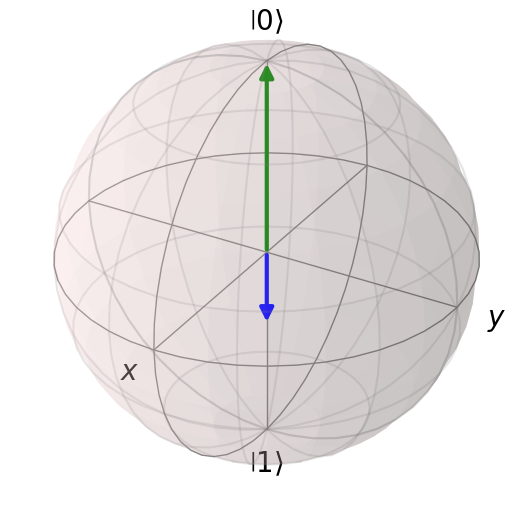

In [28]:
# create plot
bloch_sphere = qt.Bloch()

state = np.array([[1, 0], [0, 0]])
go.plot_bloch_state(state, bloch_sphere, "green")


instructions = go.create_instruction_list([["bitflip",0.7,[1]]])
        
state = reduce(go.apply_instruction, instructions, state)
go.plot_bloch_state(state, bloch_sphere, "blue")

bloch_sphere.show()

### Phaseflip Channel

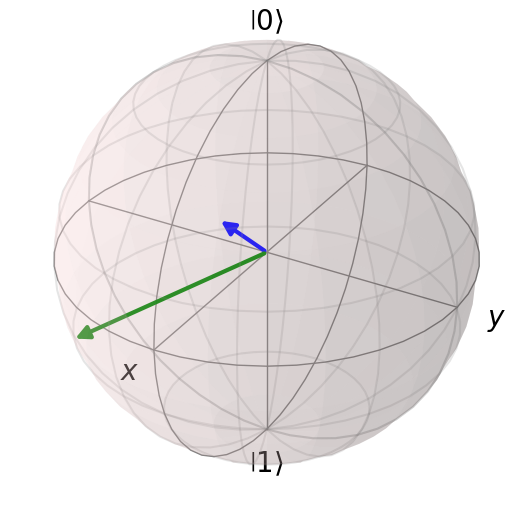

In [29]:
# create plot
bloch_sphere = qt.Bloch()

state = np.array([1,1+1j])
state = go.normalization_check(state)
state = np.outer(state, state.conj())
go.plot_bloch_state(state, bloch_sphere, "green")
        
instructions = go.create_instruction_list([["phaseflip",1,[1]]])
        
state = reduce(go.apply_instruction, instructions, state)

go.plot_bloch_state(state, bloch_sphere, "blue")

bloch_sphere.show()

### Amplitude Damping Channel

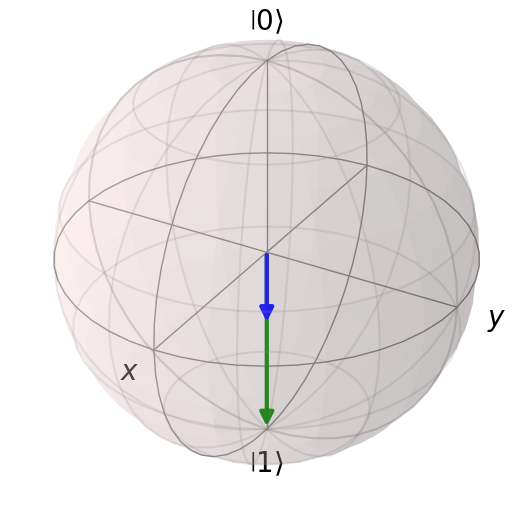

In [30]:
# create plot
bloch_sphere = qt.Bloch()

state = np.array([[0, 0], [0, 1]])
go.plot_bloch_state(state, bloch_sphere, "green")
        
instructions = go.create_instruction_list([["ampdamp",0.3,[1]]])
        
state = reduce(go.apply_instruction, instructions, state)

go.plot_bloch_state(state, bloch_sphere, "blue")

bloch_sphere.show()

### Depolarizing Channel

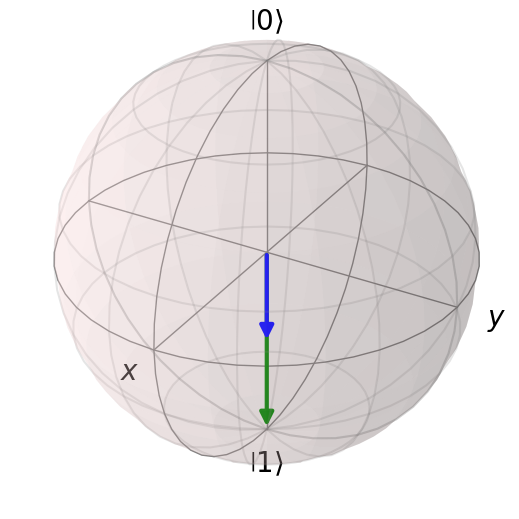

In [31]:
# create plot
bloch_sphere = qt.Bloch()

state = np.array([[0, 0], [0, 1]])
go.plot_bloch_state(state, bloch_sphere, "green")
        
instructions = go.create_instruction_list([["depol",0.5]])
        
state = reduce(go.apply_instruction, instructions, state)

go.plot_bloch_state(state, bloch_sphere, "blue")

bloch_sphere.show()

# Deutsch-Josza Algorithm

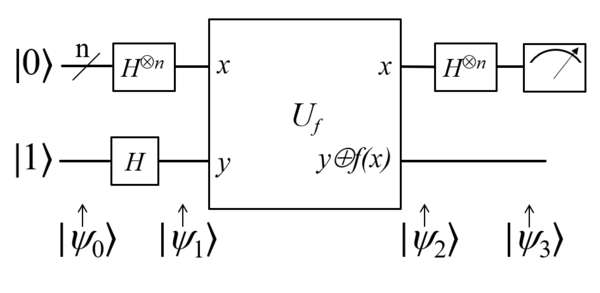

In [32]:
# The black box function. Is it constant or balanced??
from deutsch_josza_black_box import black_box

bits = 3

# vector computation
if go.deutsch_josza(black_box, bits) == 1:
    print(str(bits) + ": function is constant")
else:
    print(str(bits) + ": function is balanced")

# density matrix computation
if go.deutsch_josza_noise(black_box, bits) == 1:
    print(str(bits) + ": function is constant")
else:
    print(str(bits) + ": function is balanced")

3: function is constant
3: function is constant


Results:

1: function is balanced

2: function is balanced

3: function is constant

4: function is balanced

5: function is constant

6: function is constant

7: function is balanced

8: function is balanced

9: function is constant

10: function is constant

# Experimental

(8, 8)


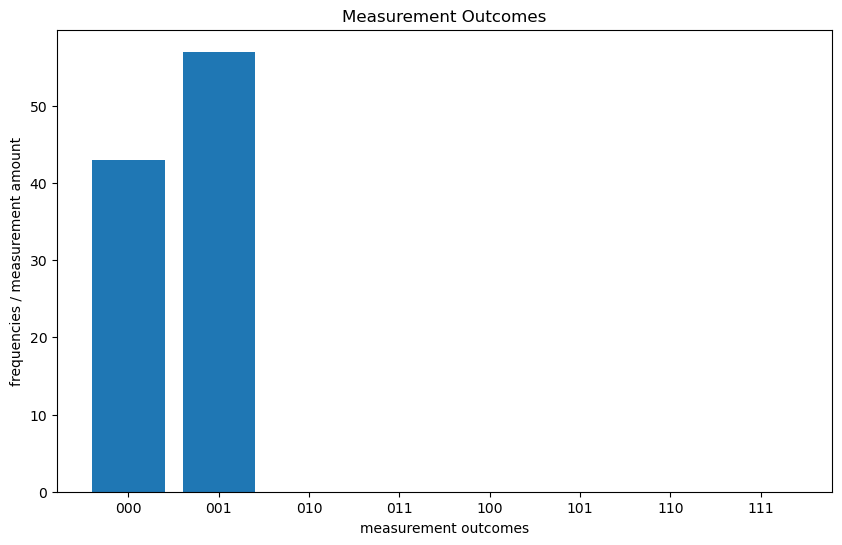

<module 'matplotlib.pyplot' from 'f:\\Programme\\Anaconda\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [33]:
qubits = 3


# create plot
bloch_sphere = qt.Bloch()

state = np.zeros((2**qubits))
state[0] = 1
state = np.outer(state, state.conj())

instructions = go.create_instruction_list([["bitflip",0.5,[3]]])

print(state.shape)

state = reduce(go.apply_instruction, instructions, state)

measurement = go.measure_computational(state,qubits,100,False)

go.plot_measurement(measurement)


# Noise!

In [53]:
# The black box function. Is it constant or balanced??
from deutsch_josza_black_box import black_box

bits = 3

# vector computation
if go.deutsch_josza(black_box, bits) == 1:
    print(str(bits) + ": function is constant")
else:
    print(str(bits) + ": function is balanced")

# density matrix computation
if go.deutsch_josza_noise(black_box, bits, go.bit_flip_channel,0.5) == 1:
    print(str(bits) + ": function is constant")
else:
    print(str(bits) + ": function is balanced")

3: function is constant
3: function is constant
